# Trying out the functions

In [1]:
import ResNet
import torch, torchvision, torchvision.transforms as transforms
from torch import nn

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])   # Given mean: (mean[1],...,mean[n]) and std: (std[1],..,std[n]) for n channels, this transform will normalize each channel of the input

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


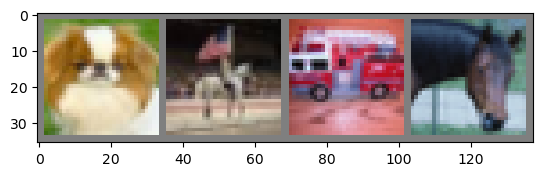

dog   horse truck horse


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
x, y =trainset[1]
list(x.shape)

[3, 32, 32]

In [14]:
base = ResNet.ResNet()
net = ResNet.classifier(base, list(x.shape), len(classes))

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.8)

In [17]:
from tqdm import tqdm
for epoch in range(1):  # loop over the dataset multiple times

    net.train()
    running_loss = 0.0
    
    print(f"Training epoch {epoch+1}")
    # Training Loop
    for i, data in tqdm(enumerate(trainloader, 0)):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
            break

    # Valiadation Loop        
    print(f"Validating:")
    for i, data in tqdm(enumerate(testloader, 0)):
        with torch.inference_mode(True):
            net.eval()
            inputs, labels = data

            outputs = net(inputs)
            loss += criterion(outputs, labels)
    print(f"Epoch: {epoch+1} | Validation Loss: {loss/len(testloader)}")


print('Finished Training')

Training epoch 1


1999it [00:34, 57.43it/s]

[1,  2000] loss: 1.175
Validating:



2500it [00:22, 110.12it/s]

Epoch: 1 | Validation Loss: 1.0951733589172363
Finished Training


In [18]:
x, y = trainset[5]
x.unsqueeze_(0)
net.eval()
out = net(x)
out.shape, classes[torch.argmax(out)], classes[y]

(torch.Size([1, 10]), 'car', 'car')

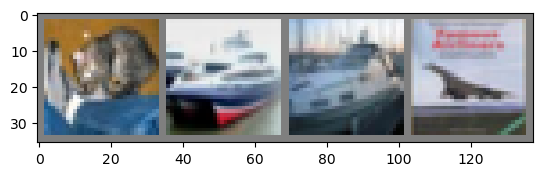

GroundTruth:  cat   ship  ship  plane


In [19]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [20]:
outputs = net(images)

In [21]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  ship  ship 
